# Visualizing Filters of a Convolutional Neural Network

## Downloading the Model

In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import random

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.5.0


In [2]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(96, 96, 3)
)

model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

## Get Layer Output

In [3]:
def get_submodel(layer_name):
    return tf.keras.models.Model(
        model.input,
        model.get_layer(layer_name).output
    )

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Image Visualization

In [4]:
def plot_image(image, title='random image'):
    image = image - tf.math.reduce_min(image)
    image = image / tf.math.reduce_max(image)
    plt.imshow(image)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

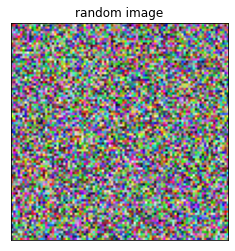

In [5]:
image = tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)
plot_image(image)

## Training Loop

In [6]:
def visualize_filter(layer_name, lr=20, iters=50, f_index=None):
    submodel = get_submodel(layer_name)
    
    num_filters = submodel.output.shape[-1]

    if not f_index:
        f_index = random.randint(0, num_filters - 1)
    
    assert num_filters > f_index, f'f_index ({f_index}) >= num_filters ({num_filters})'

    print(f'Maximizing image for layer {layer_name} and filter {f_index}')

    image = tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)

    for i in range(0, iters):
        with tf.GradientTape() as tape:
            tape.watch(image)
            output = submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
            loss = tf.math.reduce_mean(output)
        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize(grads)
        image += grads * lr

    plot_image(image, f'{layer_name} ({f_index})')

## Final Results

In [7]:
print([layer.name for layer in model.layers])

['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


Maximizing image for layer input_1 and filter 1


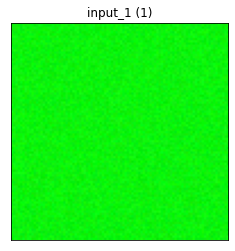

Maximizing image for layer block1_conv1 and filter 58


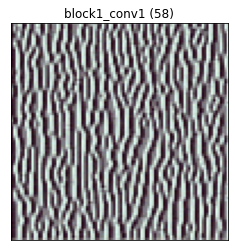

Maximizing image for layer block1_conv2 and filter 40


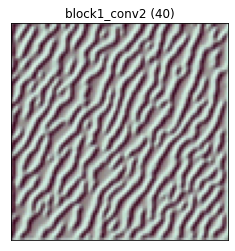

Maximizing image for layer block1_pool and filter 6


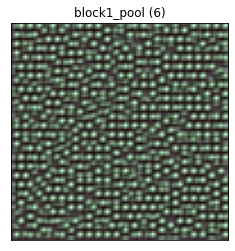

Maximizing image for layer block2_conv1 and filter 112


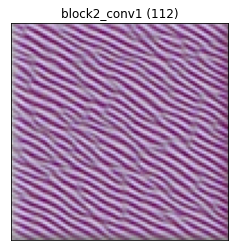

Maximizing image for layer block2_conv2 and filter 85


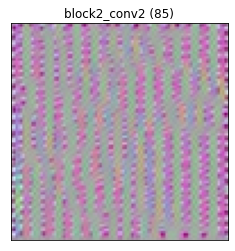

Maximizing image for layer block2_pool and filter 25


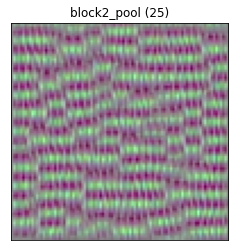

Maximizing image for layer block3_conv1 and filter 16


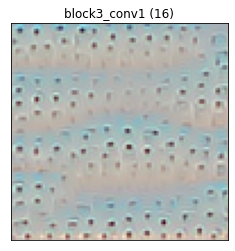

Maximizing image for layer block3_conv2 and filter 27


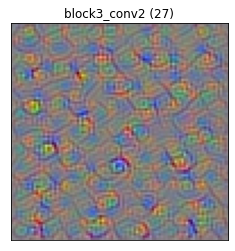

Maximizing image for layer block3_conv3 and filter 98


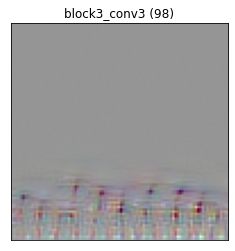

Maximizing image for layer block3_pool and filter 161


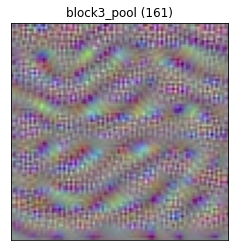

Maximizing image for layer block4_conv1 and filter 271


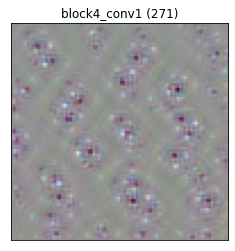

Maximizing image for layer block4_conv2 and filter 347


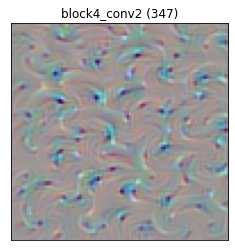

Maximizing image for layer block4_conv3 and filter 405


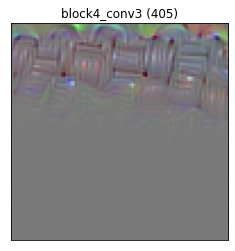

Maximizing image for layer block4_pool and filter 65


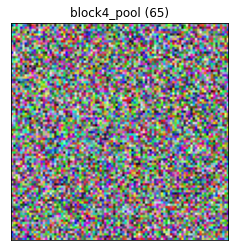

Maximizing image for layer block5_conv1 and filter 390


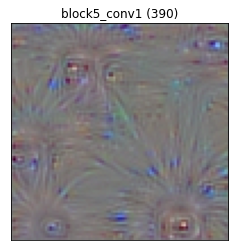

Maximizing image for layer block5_conv2 and filter 385


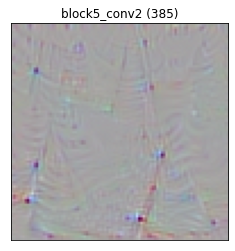

Maximizing image for layer block5_conv3 and filter 241


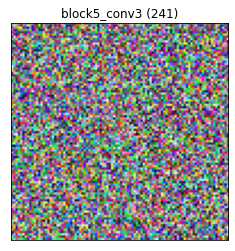

Maximizing image for layer block5_pool and filter 160


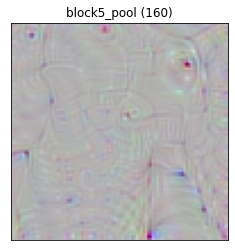

In [11]:
for layer in model.layers:
  visualize_filter(layer_name=layer.name)